# Exploratory Data Analysis

## 1. Defining the Question

How many individuals are most likely to use or have access to  bank account across Kenya, Rwanda, Uganda, and Tanzania?

What is the financial inclusion situation in Kenya, Rwanda, Uganda, and Tanzania?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Financial_df = pd.read_csv("http://bit.ly/FinancialDataset")
Financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [2]:
Financial_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [3]:
VarDef_df= pd.read_csv("http://bit.ly/VariableDefinitions")
VarDef_df.head(3)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee


In [4]:
#Check outliers
#Max and mean age is 100 and min 16
#16 year old is not qualified to hold a bank account
#max year of 2056 is clearly false
Financial_df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


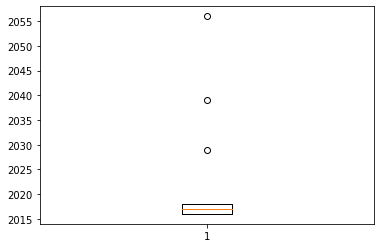

In [5]:
#Year
plt.boxplot(Financial_df['year'])
plt.show()

The year data has some incorrect values.

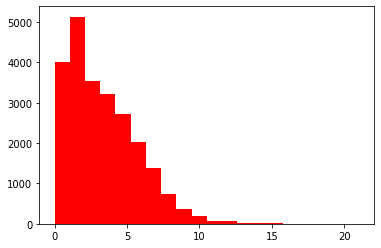

In [6]:
#Majority of respondants live in household of 1 member
plt.hist(Financial_df['household_size'],bins=20,color='red')
plt.show()

In [7]:
# records of respondants with household recorded as 0
# a household is defined as one or more person occupying a single housing unit, related or unrelated.
Financial_df.loc[Financial_df['household_size']== 0].count()

country                   36
year                      36
uniqueid                  36
Has a Bank account        36
Type of Location          36
Cell Phone Access         36
household_size            36
Respondent Age            36
gender_of_respondent      36
The relathip with head    36
marital_status            36
Level of Educuation       36
Type of Job               36
dtype: int64

In [8]:
#Checking responders age
Financial_df['Respondent Age'].describe()

count    23490.000000
mean        38.804300
std         16.519996
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

In [9]:
index = Financial_df[(Financial_df['Respondent Age'] < 18)].index

Financial_df.drop(index,inplace=True)

Financial_df['Respondent Age'].describe()

count    22551.000000
mean        39.732695
std         16.208066
min         18.000000
25%         27.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: Respondent Age, dtype: float64

Dropping account holders below the age of 18

In [10]:
Financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        35
Type of Location          15
Cell Phone Access         11
household_size            26
Respondent Age            34
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
Financial_df = Financial_df[~Financial_df['Respondent Age'].isnull()].copy()
Financial_df = Financial_df[~Financial_df['Type of Job'].isnull()].copy()
Financial_df = Financial_df[~Financial_df['Has a Bank account'].isnull()].copy()
Financial_df = Financial_df[~Financial_df['country'].isnull()].copy()
Financial_df = Financial_df[~Financial_df['gender_of_respondent'].isnull()].copy()
Financial_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           7
Cell Phone Access          3
household_size            20
Respondent Age             0
gender_of_respondent       0
The relathip with head     0
marital_status            19
Level of Educuation        0
Type of Job                0
dtype: int64

In [12]:
household_mode = Financial_df['household_size'].mode()[0]
location_mode = Financial_df['Type of Location'].mode()[0]
marital_mode = Financial_df['marital_status'].mode()[0]
CellphoneAccess_mode =  Financial_df['Cell Phone Access'].mode()[0]
Financial_df['household_size'].fillna(household_mode, inplace=True)
Financial_df['Type of Location'].fillna(location_mode, inplace=True)
Financial_df['marital_status'].fillna(marital_mode, inplace=True)
Financial_df['Cell Phone Access'].fillna(CellphoneAccess_mode, inplace=True)

Financial_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

# Univariate Analysis

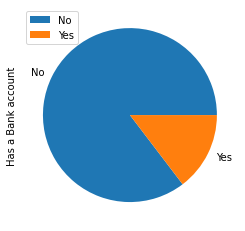

In [81]:
#pecentage of people with bank account
Financial_df['Has a Bank account'].value_counts(normalize= True).plot.pie()
plt.legend(loc='upper left')
plt.show()

Observation
1. Majority of the population does not have access to bank account

<function matplotlib.pyplot.show>

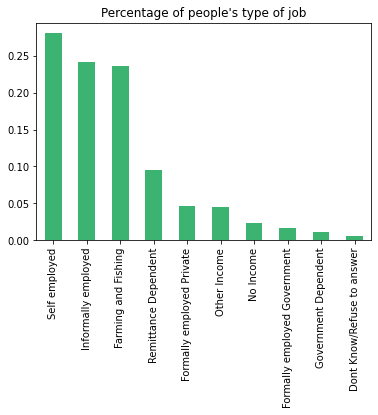

In [14]:
#percentage of people's types of jobs
Financial_df['Type of Job'].value_counts(normalize =  True).plot.bar(color ='mediumseagreen')
plt.title("Percentage of people's type of job")
plt.show

In [15]:
#mean age of individuals
Financial_df['Respondent Age'].mean()

39.735726373920016

In [16]:
#Mode of age of individuals
Financial_df['Respondent Age'].mode()

0    30.0
dtype: float64

In [17]:
#Finding the median of household size
Financial_df['household_size'].median()

3.0

In [18]:
#finding the mode of year the samole were collected
Financial_df['year'].mode()

0    2016
dtype: int64

In [19]:
#Calculating the standard deviation of age
#results imply that our data points are spread out over a wide range of values
Financial_df['Respondent Age'].std()

16.21321630206838

In [20]:
Financial_df['Respondent Age'].var()

262.86838285765583

In [21]:
#find the range of the oldest respondent from the youngest one
max_age = Financial_df['Respondent Age'].max()
min_age = Financial_df['Respondent Age'].min()

max_age - min_age

82.0

In [22]:
#find the quantiles of household
Financial_df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [23]:
#skewness of age
#positive skewness because the mean is greater than the mode
Financial_df['Respondent Age'].skew()

0.8655370531233719

In [24]:
#finding the kurtosis of age
#leptokurtic distribution
Financial_df['Respondent Age'].kurt()

0.12044293009215234

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Age's boxplot distributuion")

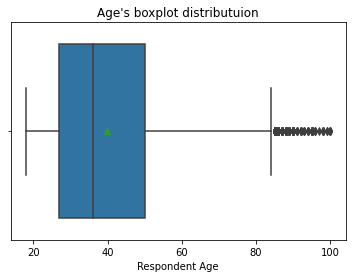

In [25]:
sns.boxplot(Financial_df['Respondent Age'],showmeans=True).set_title("Age's boxplot distributuion")

# Bivariate Analysis

[]

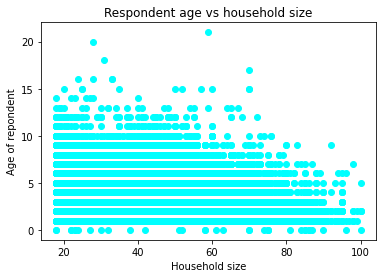

In [26]:
#find which scatter plot of respondent age in relation to house hold size

plt.scatter(Financial_df['Respondent Age'],Financial_df['household_size'],c='cyan')
plt.title("Respondent age vs household size")
plt.ylabel("Age of repondent")
plt.xlabel("Household size")
plt.plot()

In [27]:
#correlation between household size vs age
pearson_coeff = Financial_df['household_size'].corr(Financial_df['Respondent Age'],method="pearson")

print(pearson_coeff)
#Control for using peasrson method
Financial_df['household_size'].corr(Financial_df['Respondent Age'])

-0.10308201921307684


-0.10308201921307684

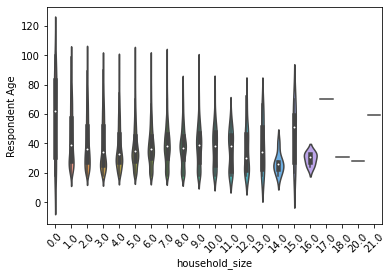

In [29]:
sns.violinplot(x=Financial_df['household_size'], y=Financial_df['Respondent Age'], data=Financial_df,size=8)
plt.xticks(rotation = 45)
plt.show()


# Multivariate Analysis

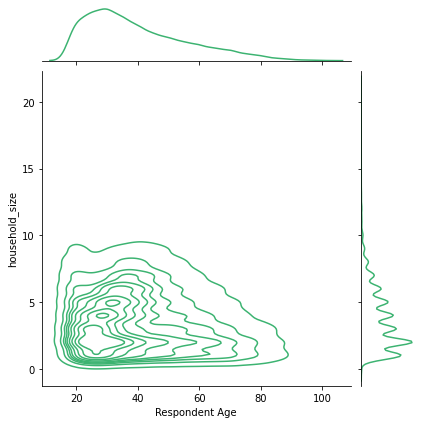

In [30]:
sns.jointplot(x=Financial_df['Respondent Age'],y=Financial_df['household_size'],data=Financial_df, kind='kde', color='mediumseagreen')
plt.show()

In [100]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

scaler = StandardScaler()
scaler.fit([Financial_df['household_size'],Financial_df['Respondent Age']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaled_data = scaler.transform([Financial_df['household_size'],Financial_df['Respondent Age']])

In [97]:
# #Normalization
sc = StandardScaler()
features = ['Respondent Age','household_size']
x=Financial_df.loc[:,features].values
y = Financial_df.loc[:,['household_size']].values

x = StandardScaler().fit_transform(x)

In [68]:
scaled_data

array([[-1., -1., -1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [73]:
pca = PCA(n_components=1)

In [74]:
pca.fit(scaled_data )

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
x_pca = pca.transform(scaled_data)

In [64]:
scaled_data

array([[-1., -1., -1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [75]:
x_pca

array([[ 1.49846588e+02,  5.22041785e-12],
       [-1.49846588e+02, -5.22041785e-12]])

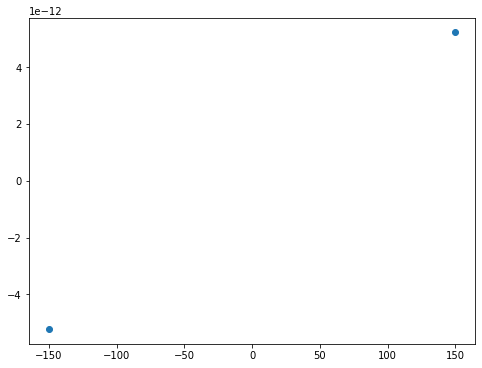

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])